<a href="https://colab.research.google.com/github/chloepark627/tensorflow_ex/blob/master/ch06_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [7]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


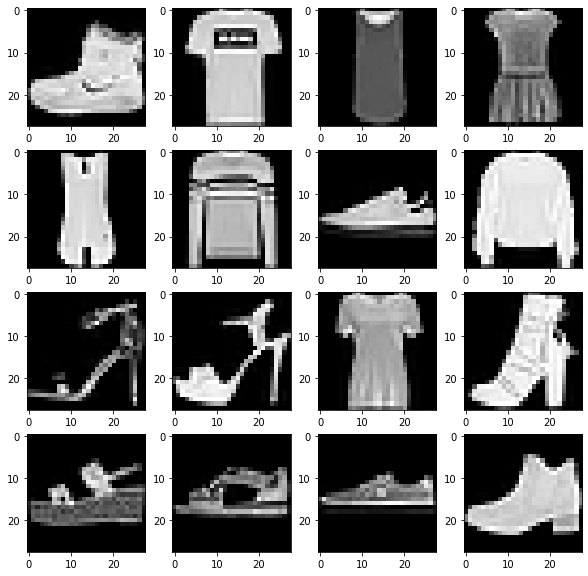

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

In [9]:
train_Y[:16]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9], dtype=uint8)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [1]:
!nvidia-smi

Sun Apr 12 01:05:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [12]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4666 - accuracy: 0.8320 - val_loss: 0.3721 - val_accuracy: 0.8642
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3361 - accuracy: 0.8782 - val_loss: 0.3751 - val_accuracy: 0.8623
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2869 - accuracy: 0.8939 - val_loss: 0.3611 - val_accuracy: 0.8703
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2440 - accuracy: 0.9093 - val_loss: 0.3959 - val_accuracy: 0.8687
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2081 - accuracy: 0.9228 - val_loss: 0.4372 - val_accuracy: 0.8687
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1820 - accuracy: 0.9329 - val_loss: 0.4834 - val_accuracy: 0.8637
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1633 - accuracy: 0.9405 - val_loss: 0.5240 - val_accuracy:

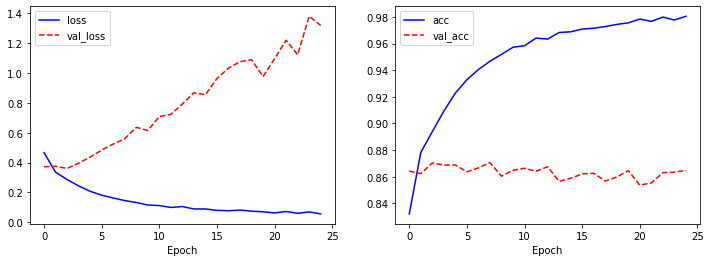

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [15]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 1.3800 - accuracy: 0.8599


[1.380013346672058, 0.8598999977111816]

In [17]:
# 과적합 방지 : 풀링레이어/ 드롭아웃레이어 추가

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [18]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5309 - accuracy: 0.8077 - val_loss: 0.3696 - val_accuracy: 0.8626
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3609 - accuracy: 0.8690 - val_loss: 0.3563 - val_accuracy: 0.8695
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3187 - accuracy: 0.8838 - val_loss: 0.3121 - val_accuracy: 0.8868
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2902 - accuracy: 0.8940 - val_loss: 0.3067 - val_accuracy: 0.8897
Epoch 5/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.9017 - val_loss: 0.3004 - val_accuracy: 0.8911
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2535 - accuracy: 0.9073 - val_loss: 0.2931 - val_accuracy: 0.8969
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2374 - accuracy: 0.9123 - val_loss: 0.3059 - val_accuracy:

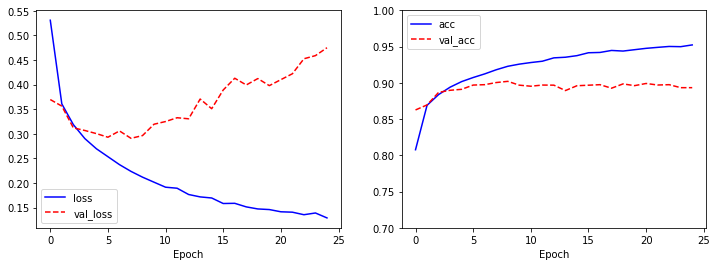

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7, 1) #y축의 범위
plt.legend()

plt.show()


In [21]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.8930


[0.4682312607765198, 0.8930000066757202]

In [23]:
#더 많은 레이어 쌓기

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size = (3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)        

In [24]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5954 - accuracy: 0.7825 - val_loss: 0.3475 - val_accuracy: 0.8725
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3752 - accuracy: 0.8657 - val_loss: 0.2697 - val_accuracy: 0.8993
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3288 - accuracy: 0.8806 - val_loss: 0.2545 - val_accuracy: 0.9041
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3058 - accuracy: 0.8903 - val_loss: 0.2408 - val_accuracy: 0.9101
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2855 - accuracy: 0.8960 - val_loss: 0.2390 - val_accuracy: 0.9103
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2844 - accuracy: 0.8987 - val_loss: 0.2367 - val_accuracy: 0.9123
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2670 - accuracy: 0.9030 - val_loss: 0.2284 - val_accuracy:

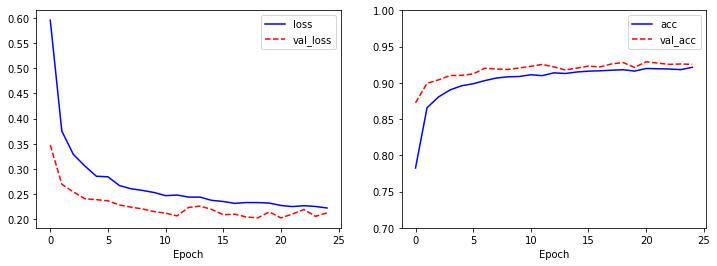

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7, 1) #y축의 범위
plt.legend()

plt.show()

In [26]:
model.evaluate(test_X, test_Y, verbose=0)

[0.22650690376758575, 0.9228000044822693]

In [47]:
import numpy as np
print(train_X.shape)
print(train_X[0].shape)
temp = np.tile(train_X[0].reshape(28*28), 100)
print(temp.shape)
print(temp[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)
(78400,)
()


In [0]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [0]:
# 이미지 보강

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size=100
x_augmented=image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

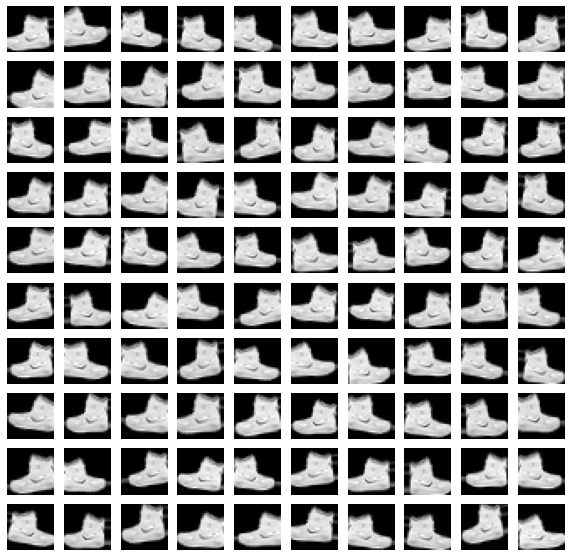

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')

plt.show()

In [50]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
augment_size = 30000
randidx = np.random.randint(train_X.shape[0], size=augment_size)

x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()

print(randidx.shape)
print(x_augmented.shape)

x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

(30000,)
(30000, 28, 28, 1)


In [51]:
print(train_X.shape, train_Y.shape)

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape, train_Y.shape)

(60000, 28, 28, 1) (60000,)
(90000, 28, 28, 1) (90000,)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6086 - accuracy: 0.7756 - val_loss: 0.6680 - val_accuracy: 0.7616
Epoch 2/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.4233 - accuracy: 0.8456 - val_loss: 0.5305 - val_accuracy: 0.7959
Epoch 3/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.3817 - accuracy: 0.8605 - val_loss: 0.5361 - val_accuracy: 0.7969
Epoch 4/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.3557 - accuracy: 0.8703 - val_loss: 0.4771 - val_accuracy: 0.8201
Epoch 5/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.3419 - accuracy: 0.8740 - val_loss: 0.4791 - val_accuracy: 0.8134
Epoch 6/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.3295 - accuracy: 0.8795 - val_loss: 0.4861 - val_accuracy: 0.8129
Epoch 7/25
2110/2110 [==============================] - 8s 4ms/step - loss: 0.3254 - accuracy: 0.8823 - val_loss: 0.4659 - val_accuracy:

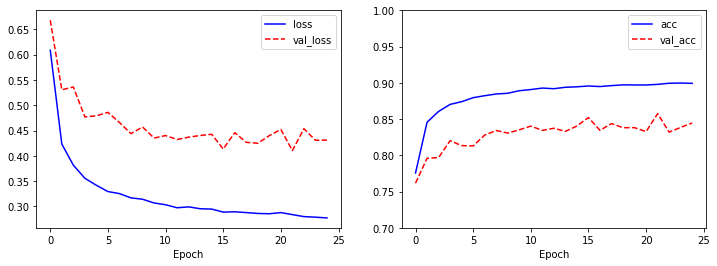

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7, 1) #y축의 범위
plt.legend()

plt.show()

In [56]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9168


[0.22816777229309082, 0.9168000221252441]

# 새 섹션